<b><font size=4>#Importing all the required libraries</font></b>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b><font size=4>#import the data set </font></b>


In [4]:
data=pd.read_csv("Fraud.csv")
#check the initial structure of the data
print('Shape of the data set:', data.shape)
data.head()

Shape of the data set: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<b><font size=4>#Discover the data provided</font></b>

In [6]:
#checking for any null values
print(data.isnull().sum())
#checking for any duplicate values
print("No. of duplicated rows in the dataset:",data.duplicated().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
No. of duplicated rows in the dataset: 0


<b><font size=4>#Examining the distribution of our target varibale</font> </b>

In [7]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64


+ <b><font size=4>Since the distribution of 0 is more in the dataset we would take out 8213 random samples from our data so that there is no overfitting for NotFraud transactions
</font></b>

In [8]:
data_notfraud=data[data['isFraud']==0].sample(8213,random_state=21)
data_fraud=data[data['isFraud']==1]
#concatenating the resultant data sets so as to make a new dataset which contains equal distribution of the categories of the column of interest
equal_dist_data=pd.concat([data_notfraud,data_fraud],axis=0).reset_index().drop(columns=['index'])
equal_dist_data['type']=equal_dist_data['type'].astype('category')
equal_dist_data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,299,PAYMENT,18162.78,C1080520821,53330.00,35167.22,M1842158729,0.00,0.00,0,0
1,140,CASH_OUT,68680.91,C1942487225,422170.00,353489.09,C1546646652,1043759.21,1112440.12,0,0
2,353,PAYMENT,8903.67,C1524134393,0.00,0.00,M1144606909,0.00,0.00,0,0
3,203,CASH_OUT,393177.26,C1542139573,272.00,0.00,C2036372840,27985.03,421162.29,0,0
4,204,CASH_IN,5794.35,C1778953085,1762398.18,1768192.54,C1207354640,369228.69,363434.34,0,0


In [9]:
#seeing the count of types of payment in our new dataset
equal_dist_data['type'].value_counts()

type
CASH_OUT    6981
TRANSFER    4795
PAYMENT     2757
CASH_IN     1840
DEBIT         53
Name: count, dtype: int64

<b><font size=4>#Seeing the distribution of each payment type in the data</font></b>

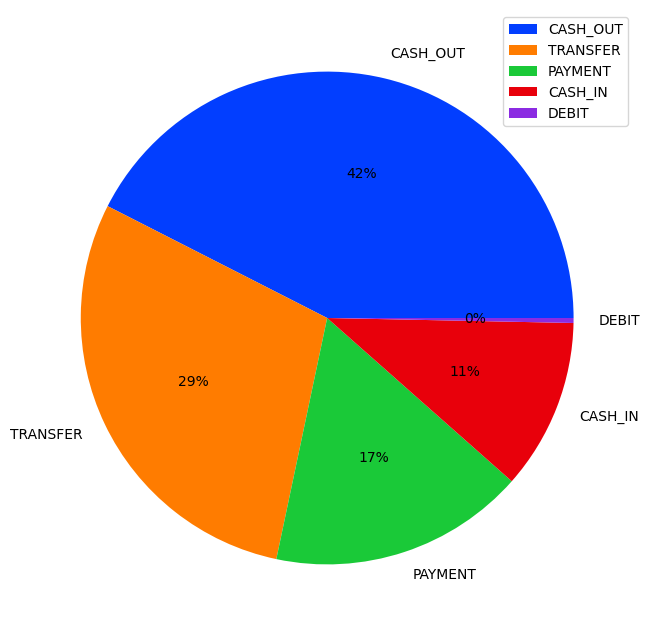

In [66]:
plt.figure(figsize=(10,8))
plt.pie(equal_dist_data['type'].value_counts(),labels=equal_dist_data['type'].value_counts().index,colors=sns.color_palette("bright"),autopct="%0.00f%%")
plt.legend()
plt.show()

<b><font size=4>#Checking the correlation of isfraud with the other columns of our dataset</font></b>

In [11]:
equal_dist_data['nameOrig'].value_counts() #checking if the transaction makers are unique 

nameOrig
C1080520821    1
C1263272342    1
C1843566745    1
C351713185     1
C58682758      1
              ..
C2034349987    1
C2126444202    1
C2018481758    1
C1423668521    1
C1280323807    1
Name: count, Length: 16426, dtype: int64

In [12]:
#encoding the type variable so that it can be used for the correlation table genreation
encoded_data=pd.get_dummies(data=equal_dist_data,columns=['type'])
encoded_data

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,299,18162.78,C1080520821,53330.00,35167.22,M1842158729,0.00,0.00,0,0,False,False,False,True,False
1,140,68680.91,C1942487225,422170.00,353489.09,C1546646652,1043759.21,1112440.12,0,0,False,True,False,False,False
2,353,8903.67,C1524134393,0.00,0.00,M1144606909,0.00,0.00,0,0,False,False,False,True,False
3,203,393177.26,C1542139573,272.00,0.00,C2036372840,27985.03,421162.29,0,0,False,True,False,False,False
4,204,5794.35,C1778953085,1762398.18,1768192.54,C1207354640,369228.69,363434.34,0,0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16421,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
16422,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
16423,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
16424,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


<b><font size=4>#Now we can check the correlation of differenct variables with our column of interest i.e. isFraud column </font></b>

In [13]:
encoded_data.drop(columns=['nameOrig','nameDest']).corr()['isFraud'].sort_values(ascending=False)

isFraud           1.000000
type_TRANSFER     0.455143
amount            0.344568
step              0.321030
type_CASH_OUT     0.154063
oldbalanceOrg     0.121180
isFlaggedFraud    0.031225
newbalanceDest    0.012642
type_DEBIT       -0.056895
oldbalanceDest   -0.084024
newbalanceOrig   -0.133330
type_CASH_IN     -0.355174
type_PAYMENT     -0.449107
Name: isFraud, dtype: float64

+ <b><font size=3>we can remove all the negatively correlated columns as the negative correlation suggests that as the value of these columns goes down there are high chances of detecting a Fraud transaction, We also drop the columns nameOrig and nameDest as they do not contribute anything in detecting a fraud transaction.</font></b>

In [14]:
encoded_data=encoded_data.drop(columns=['type_DEBIT','oldbalanceDest','newbalanceOrig','type_CASH_IN','type_PAYMENT','nameOrig','nameDest'])

In [15]:
encoded_data.head()

,step,amount,oldbalanceOrg,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_TRANSFER
0,299,18162.78,53330.00,0.00,0,0,False,False
1,140,68680.91,422170.00,1112440.12,0,0,True,False
2,353,8903.67,0.00,0.00,0,0,False,False
3,203,393177.26,272.00,421162.29,0,0,True,False
4,204,5794.35,1762398.18,363434.34,0,0,False,False


<b><font size=4>#Now we can compare all of the columns with our isFraud column</font></b>

Text(0.5, 1.0, 'Count for isFlaggedFraud actually depicting Fraudulent Transactions')

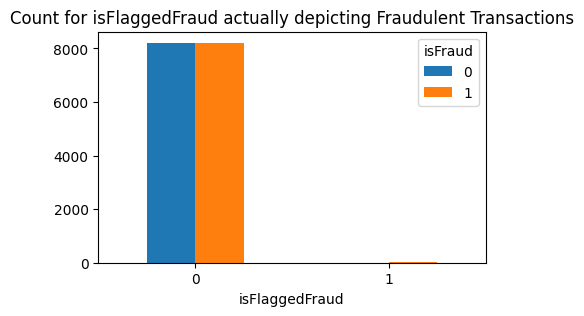

In [16]:
#comparing isFraud and isFlaggedFraud
crosstab_res=pd.crosstab(index=encoded_data['isFlaggedFraud'],columns=encoded_data['isFraud'])
crosstab_res.plot.bar(figsize=(5,3),rot=0)
plt.title("Count for isFlaggedFraud actually depicting Fraudulent Transactions")

+ <b><font size=4>it is clearly visible from the plot that isFlagged column is not a good predictor that whether the transaction is actually fraud or not so we can drop this column too.</font></b>

In [17]:
encoded_data=encoded_data.drop(columns=['isFlaggedFraud'])
encoded_data.head()

,step,amount,oldbalanceOrg,newbalanceDest,isFraud,type_CASH_OUT,type_TRANSFER
0,299,18162.78,53330.00,0.00,0,False,False
1,140,68680.91,422170.00,1112440.12,0,True,False
2,353,8903.67,0.00,0.00,0,False,False
3,203,393177.26,272.00,421162.29,0,True,False
4,204,5794.35,1762398.18,363434.34,0,False,False


<b><font size=4>#we can visualize the relation between newbalanceDest and oldbalanceOrg for isFraud column as follows:</font></b>

Text(0.5, 1.0, 'Old Balance of Sender Vs New Balance of the Reciever')

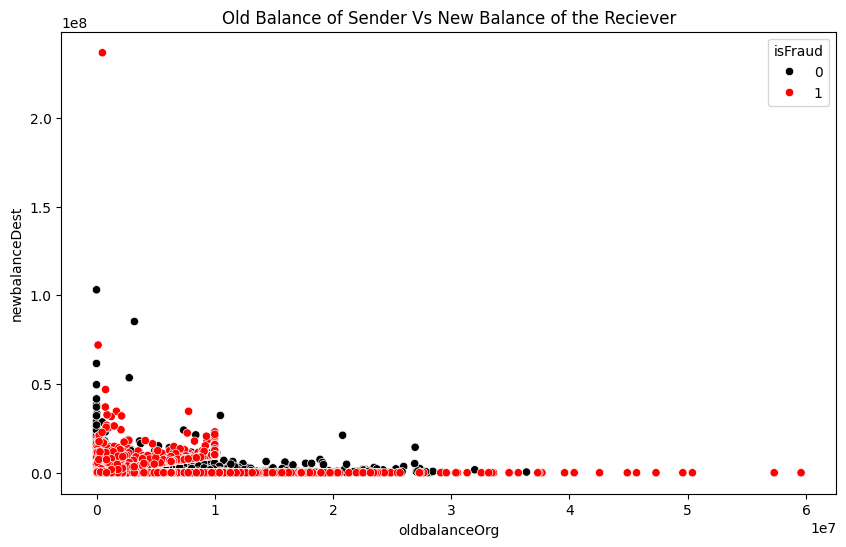

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=encoded_data['oldbalanceOrg'],y=encoded_data['newbalanceDest'],hue=encoded_data['isFraud'],palette=['black','red'])
plt.title("Old Balance of Sender Vs New Balance of the Reciever")

+ <b><font size=4>it is clearly visible that irrespective of the variation in old balance of the sender, the Fraud transactions have increased the new balance feebly at the reciever's end.</font></b>

<b><font size=4>#visualizing the relation between step amount and isFraud columns</font></b>

Text(0.5, 1.0, 'Step VS Transaction amount')

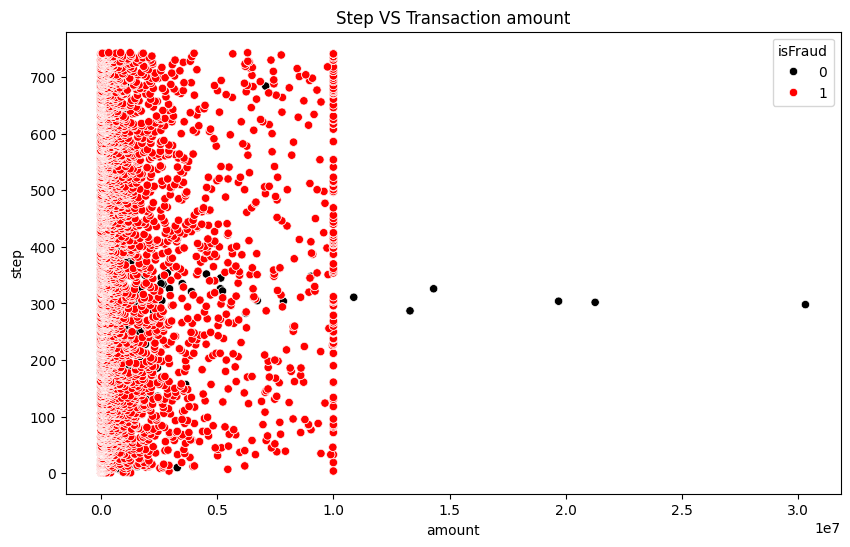

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=encoded_data['amount'],y=encoded_data['step'],hue=encoded_data.isFraud, palette=['black','red'])
plt.title("Step VS Transaction amount")                                                                                                

+ <b><font size=4>There are high number of fraud transacions for lesser transaction amount even if steps are large or small</font></b>

<b><font size=3>#First we will scale our data because the "amount" column has different scale i.e. in thousands mostly, "step" column has different scale while our other columns contain data of the form 0 or 1 only. Then we will train multiple models with different algorithms so that we can assess the accuracy of different models over our data. </font></b>

In [20]:
#importing required packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [22]:
#split the data into dependent (isFraud column) and independent(all columns except isFraud) variables and then split the training and testing data
x= encoded_data.drop(columns=['isFraud']).values
y=encoded_data['isFraud'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [26]:
#scale the training and test data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [42]:
#create a dictionary with initialization of each model
models={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
         "Decision Tree":DecisionTreeClassifier()}

In [49]:
#initialize an empty list to store the result of cv_scores for each model and a Kfold object for cross validation
results=[]
kf=KFold(n_splits=6,random_state=42,shuffle=True) #dividing data into 6 folds for cross validation

In [50]:
#Loop through each model to fit and train that model with scaled data, check for the cross validation score for each model
for model in models.values():
    cv_result=cross_val_score(model,x_train_scaled,y_train,cv=kf)
    results.append(cv_result) #appending the list of cv scores of each model into our main result list
results

[array([0.85289515, 0.84820031, 0.84864301, 0.82724426, 0.85803758,
        0.84916493]),
 array([0.93375065, 0.93270736, 0.93475992, 0.93736952, 0.93789144,
        0.94311065]),
 array([0.97809077, 0.97496088, 0.97807933, 0.97651357, 0.97025052,
        0.97860125])]

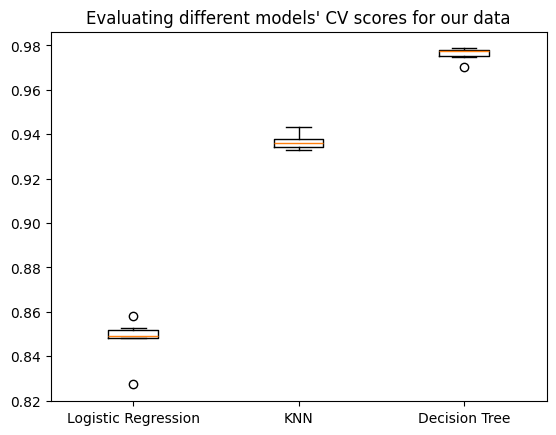

In [52]:
#Plot a barplot to see the distribution of CV scores for each model
plt.boxplot(results,labels=models.keys())
plt.title("Evaluating different models' CV scores for our data")
plt.show()

<b><font size=4>#It can be seen that Decision tree Classifier is performing best for our data, we can also check the models' accuracy scores over our test data as following:</font></b>

In [53]:
for name,model in models.items():
    model.fit(x_train_scaled,y_train)
    test_score=model.score(x_test_scaled,y_test)
    print(f"{name} Test Set Accuracy: {test_score}")

Logistic Regression Test Set Accuracy: 0.8526785714285714
KNN Test Set Accuracy: 0.9456168831168831
Decision Tree Test Set Accuracy: 0.9730113636363636


In [55]:
# we can further use GridSearchCV to get the best score for Decision Tree Classifier model as follows:
from sklearn.model_selection import GridSearchCV
param_grid={
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
}
Decision_Tree_CV=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=kf)
Decision_Tree_CV.fit(x_train_scaled,y_train)
print(Decision_Tree_CV.best_params_,Decision_Tree_CV.best_score_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5} 0.9764311208107949


<b><font size=4>From our insights it was clear that company should take following measures:</font></b>
  + Company should promote all the type of transactions except TRANSFER and  CASH_OUT.
  + The Transaction having large amount size are more reliable.
  + There must be a check on Lower increase in the Reciever's new balance.
  